# Terceira aula
## Projeto de Data Science e aplicação de Machine Learning
- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio  

---------------------------------------------------------------------------------------

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados


#### Importar a base de dados

In [1]:
import pandas as pd

tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
tabela.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


#### Análise exploratória  
- Tentativa de visualizar como as informações de cada item estão distribuídas  
- Ver a correlação entre cada um dos itens

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

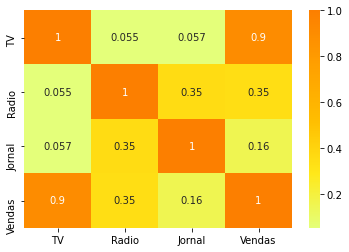

In [6]:
sns.heatmap(tabela.corr(), annot=True, cmap='Wistia')
plt.show()

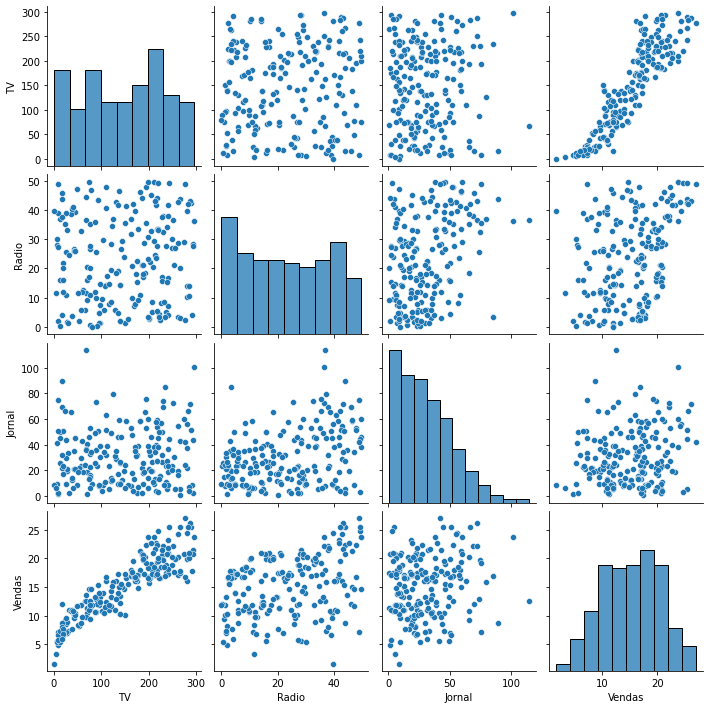

In [9]:
sns.pairplot(tabela)
plt.show()

#### Preparar os dados para treinamento do Modelo de Machine Learning
- Separando os valores de treino e de teste

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = tabela['Vendas']
x = tabela.drop('Vendas', axis=1)

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)

#### Como temos um problema de regressão - Vamos escolher os modelos que vamos usar:
- Regressão Linear (encontrar um número)  
- RandomForest (árvore de decisão) (categorizar)

In [13]:
# importa os modelos de IA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [14]:
# cria os modelos de inteligencias artificiais
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

In [15]:
# treina as inteligencias artificiais
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

#### Testando a AI e avaliação do melhor modelo
- Será utilizado o R² -> diz a % que o nosso modelo consegue explicar o que acontece

In [16]:
from sklearn import metrics

In [28]:
# criando as previsões
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

In [29]:
# comparando os modelos
score_regressaolinear = metrics.r2_score(y_teste, previsao_regressaolinear)
score_arvoredecisao = metrics.r2_score(y_teste, previsao_arvoredecisao)
print(f'R² para o modelo de regressão linear: {score_regressaolinear:.3%}')
print(f'R² para o modelo de árvore de decisão: {score_arvoredecisao:.3%}')

R² para o modelo de regressão linear: 90.712%
R² para o modelo de árvore de decisão: 96.396%


#### Visualização gráfica das previsões

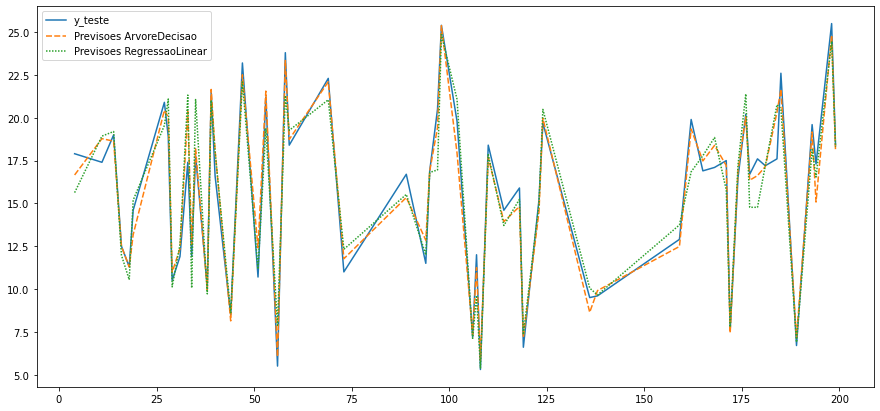

In [31]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsoes ArvoreDecisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsoes RegressaoLinear'] = previsao_regressaolinear

plt.figure(figsize=(15,7))
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Qual a importância de cada variável para as vendas?

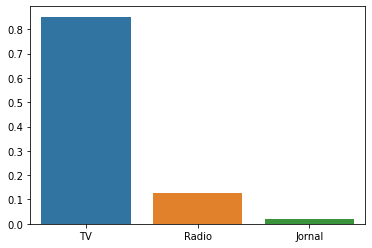

In [33]:
sns.barplot(x=x_treino.columns, y=modelo_arvoredecisao.feature_importances_)
plt.show()

#### Será que estamos investindo certo?

Os dados mostram que existe uma importância MUITO grande no investimento de marketing de TV, tendo um peso muito maior do que de rádio e jornal. Além disto, apesar do rádio ter menos importância do que a TV, ele ainda é mais relevante do que o jornal.